In [100]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn import neighbors
from sklearn.externals import joblib

import matplotlib.pyplot as plt
%matplotlib inline

import base64

import requests

import warnings
warnings.filterwarnings('ignore')

In [4]:
features_train = pd.read_csv('features_train.csv')

In [5]:
features_train['image_serialized'] = 0


In [6]:
features_train = pd.concat((features_train.iloc[:,0],features_train.image_serialized),axis=1)

In [7]:
for i, image in enumerate(np.asarray(features_train.iloc[:,0])):
    sku = image.split('_')[0]
    
    img = cv2.imread('../produtos_clean/'+sku+'_detalhe1.jpg')
    
    _, img_encoded = cv2.imencode('.jpg', img)

    encoded = img_encoded.tostring()
    #encoded = base64.b64encode(img_encoded)
    #with open('../produtos_clean/'+sku+'_detalhe1.jpg', "rb") as imageFile:
    #    str_img = base64.b64encode(imageFile.read())
    
    features_train.iloc[i,-1] = encoded

In [8]:
features_train.columns = ['COD','image_serialized']

In [9]:
dados_preco = pd.read_csv('dados_preco.csv',index_col=False)


In [10]:
features_train.merge(dados_preco, on='COD', how='left').to_csv('dataset_netshoes.csv')

In [11]:
features_train = features_train.merge(dados_preco, on='COD', how='left')

# API

In [118]:
img = cv2.imread('../production/test_images/teste.jpeg')
_, img_encoded = cv2.imencode('.jpg', img)
encoded = img_encoded.tostring()

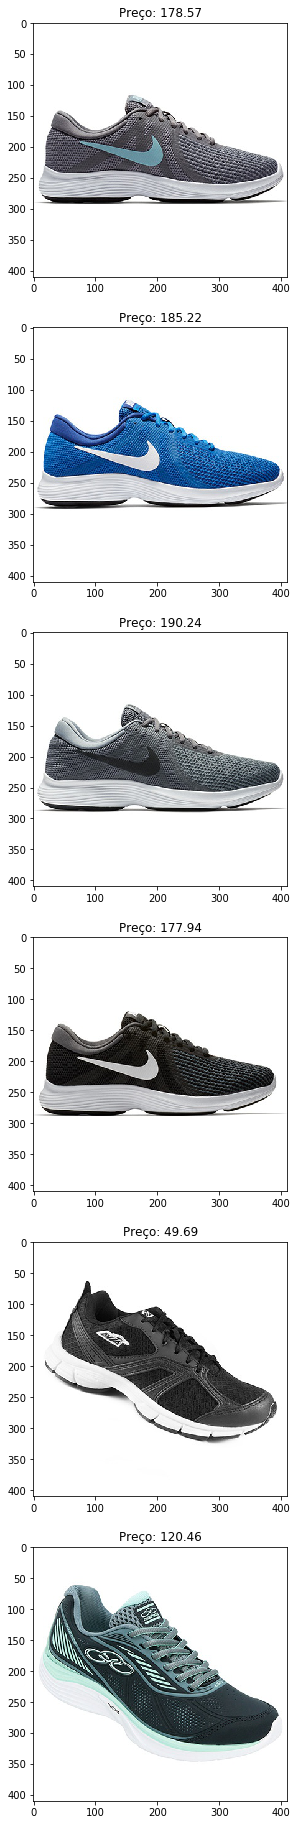

In [119]:
#Setting the headers to send and accept json responses
header = {'Content-Type': 'image/jpeg'}

#running POST on API
resp = requests.post("http://0.0.0.0:5000/api/predict", \
                    data = encoded,\
                    headers= header)

similar_items = list(resp.json()['COD'].values())

df_similar_items = features_train[features_train.COD.isin(similar_items)]

plt.figure(figsize=(100,100))
for i in range(len(df_similar_items)):
    plt.subplot(18,1,i+1)
    nparr = np.fromstring(df_similar_items.iloc[i,1], np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    im2 = img.copy()
    im2[:, :, 0] = img[:, :, 2]
    im2[:, :, 2] = img[:, :, 0]
    plt.imshow(im2)
    plt.gca().set_title('Preço: {0:.2f}'.format(df_similar_items.iloc[i,2]))

In [ ]:
dados_preco = pd.read_csv('dados_preco.csv',index_col=False)
print(dados_preco.COD.isin(np.asarray(SKUs.iloc[crops_inds[0][0]])).sum())
print(dados_preco)
dados_preco = dados_preco[dados_preco.COD.isin(np.asarray(SKUs.iloc[crops_inds[0][0]]))]
print(dados_preco)
dados_preco = dados_preco.drop(grubbs.max_test_indices(dados_preco.VALOR_UNIDADE, alpha=0.05),axis=0)

In [5]:
features_train = pd.read_csv('features_train.csv')

In [43]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536
0,teste_cropped.jpeg,0.033340,0.236150,0.101529,0.333587,0.542920,0.009829,0.782146,0.143391,0.054987,...,0.000122,0.597546,0.573985,0.018470,0.000750,0.049023,0.028737,0.497884,0.086180,0.147294
1,teste2.jpeg,0.135097,0.471829,0.067580,0.024908,1.082137,0.279453,0.578938,0.396836,0.144301,...,0.032019,0.606933,0.118385,0.073449,0.007594,0.083242,0.259450,0.276744,0.137676,0.068701
2,teste.jpeg,0.045631,0.069492,0.025524,0.797401,0.482060,0.019170,0.652529,0.768107,0.064213,...,0.000000,0.655055,0.546819,0.000000,0.030430,0.193866,0.102485,0.128465,0.269256,0.479965


In [8]:
kd_tree = neighbors.KDTree(features_train.iloc[:,1:], leaf_size=3)

In [9]:
joblib.dump(kd_tree, 'kd_tree.pkl') 

['kd_tree.pkl']

In [46]:
dist, ind = kd_tree.query([features.iloc[1,1:]], k=3)

In [47]:
print(ind)

[[741 153 320]]


In [48]:
print(dist)

[[7.62167421 7.9439243  7.99744422]]
